# Using class Grid3d

In [1]:
import ttcrpy.rgrid as rg
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Define model

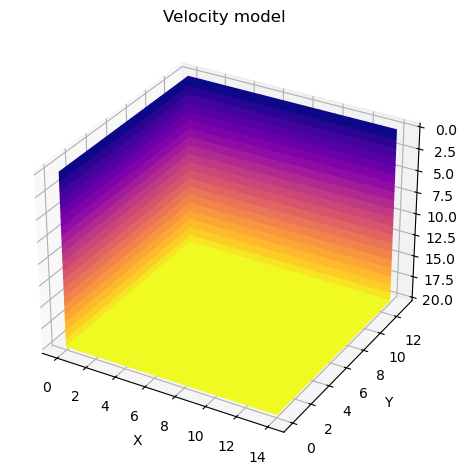

In [2]:
# grid node coordinates

x = np.arange(15.0)
y = np.arange(14.0)
z = np.arange(21.0)

# vertical gradient
a = 1.0
V20 = 3.0
b = (V20-a)/20.0

# fill in model
V = np.empty((x.size, y.size, z.size))
for n in range(z.size):
    V[:, :, n] = a + b*z[n]

# check model
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

min_val = V.min()
max_val = V.max()
n_x, n_y, n_z = V.shape
colormap = plt.cm.plasma

cut = V[0,:,:]
Y, Z = np.mgrid[0:n_y, 0:n_z]
X = np.zeros((n_y, n_z))
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap((cut-min_val)/(max_val-min_val)), shade=False)
cut = V[:,-1,:]
X, Z = np.mgrid[0:n_x, 0:n_z]
Y = y[-1] + np.zeros((n_x, n_z))
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap((cut-min_val)/(max_val-min_val)), shade=False)
cut = V[:,:,-1]
X, Y = np.mgrid[0:n_x, 0:n_y]
Z = z[-1] + np.zeros((n_x, n_y))
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap((cut-min_val)/(max_val-min_val)), shade=False)
ax.invert_zaxis()
ax.set_title("Velocity model")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.tight_layout()
plt.show()

### Define source and receiver points and create grid instance

In [3]:
# src and rcv should be 2D arrays

src = np.array([[0.5, 0.5, 0.5]])
rcv = np.array([[2.0, 2.0, 0.5],
                [4.0, 4.0, 0.5],
                [6.0, 6.0, 0.5],
                [8.0, 8.0, 0.5],
                [10.0, 10.0, 0.5],
                [12.0, 12.0, 2.5],
                [12.0, 12.0, 4.5],
                [12.0, 12.0, 6.5],
                [12.0, 12.0, 8.5],
                [12.0, 12.0, 10.5],
                [12.0, 12.0, 12.5],
                [12.0, 12.0, 14.5],
                [12.0, 12.0, 16.5]])

# slowness will de assigned to grid nodes, we must pass cell_slowness=False
grid = rg.Grid3d(x, y, z, cell_slowness=False)

### Perform computation

In [4]:
# we need to input slowness
slowness = 1./V

tt, rays = grid.raytrace(src, rcv, slowness, return_rays=True)

/var/folders/my/mlz8ktrs16g2gy8xqqnyqb880000gn/T/ipykernel_36802/237682247.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tt, rays = grid.raytrace(src, rcv, slowness, return_rays=True)


### Look at computed traveltimes

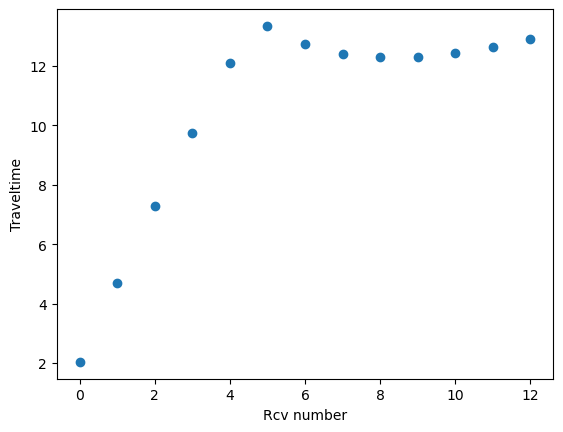

In [5]:
plt.plot(tt, 'o')
plt.xlabel('Rcv number')
plt.ylabel('Traveltime')
plt.show()

### Check raypaths

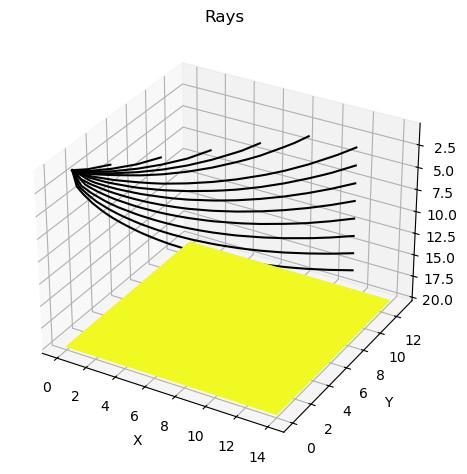

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
min_val = V.min()
max_val = V.max()
n_x, n_y, n_z = V.shape
colormap = plt.cm.plasma

cut = V[:,:,-1]
X, Y = np.mgrid[0:n_x, 0:n_y]
Z = z[-1] + np.zeros((n_x, n_y))
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap((cut-min_val)/(max_val-min_val)), shade=False)

for r in rays:
    ax.plot(r[:,0], r[:,1], r[:,2],'-k')

ax.invert_zaxis()
ax.set_title("Rays")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.tight_layout()

plt.show()

Check traveltimes at grid nodes

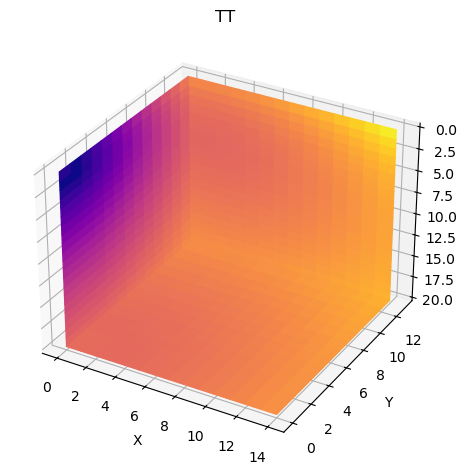

In [7]:
tt_grid = grid.get_grid_traveltimes()

# check model
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

min_val = tt_grid.min()
max_val = tt_grid.max()
n_x, n_y, n_z = tt_grid.shape
colormap = plt.cm.plasma

cut = tt_grid[0,:,:]
Y, Z = np.mgrid[0:n_y, 0:n_z]
X = np.zeros((n_y, n_z))
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap((cut-min_val)/(max_val-min_val)), shade=False)
cut = tt_grid[:,-1,:]
X, Z = np.mgrid[0:n_x, 0:n_z]
Y = y[-1] + np.zeros((n_x, n_z))
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap((cut-min_val)/(max_val-min_val)), shade=False)
cut = tt_grid[:,:,-1]
X, Y = np.mgrid[0:n_x, 0:n_y]
Z = z[-1] + np.zeros((n_x, n_y))
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colormap((cut-min_val)/(max_val-min_val)), shade=False)
ax.invert_zaxis()
ax.set_title("TT")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.tight_layout()
plt.show()